<a href="https://colab.research.google.com/github/sulimankhan587/Keylogger/blob/main/keylogger_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

%matplotlib inline

# **Read Data**

In [ ]:
datapath = "keylogger_dataset.csv"

In [ ]:
df=pd.read_csv(datapath,sep=",",encoding = 'latin')    #software level defect
#pd.pandas.set_option('display.max_columns',None)
df

,Unnamed: 0.1,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,0,10.42.0.211-52.6.25.230-34451-443-6,10.42.0.211,34451,52.6.25.230,443,6,4/8/2017 5:12,12140931,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,1,1,172.217.3.99-10.42.0.151-443-53892-6,10.42.0.151,53892,172.217.3.99,443,6,4/8/2017 7:55,418882,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,2,2,172.217.3.98-10.42.0.151-443-50750-6,172.217.3.98,443,10.42.0.151,50750,6,4/8/2017 8:48,45,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,3,3,10.42.0.211-10.42.0.1-23025-53-17,10.42.0.211,23025,10.42.0.1,53,17,4/8/2017 5:54,541699,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,4,4,10.42.0.211-123.129.244.226-52602-443-6,10.42.0.211,52602,123.129.244.226,443,6,4/8/2017 8:44,7310795,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,203.205.158.63-10.42.0.211-80-58573-6,203.205.158.63,80,10.42.0.211,58573,6,26/06/2017 06:56:05,220047,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Keylogger
996,996,996,172.217.11.46-10.42.0.151-443-35604-6,10.42.0.151,35604,172.217.11.46,443,6,5/8/2017 7:26,1205304,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
997,997,997,220.243.235.201-10.42.0.42-80-52599-6,10.42.0.42,52599,220.243.235.201,80,6,4/8/2017 6:02,7658686,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
998,998,998,172.217.10.227-10.42.0.42-80-44282-6,172.217.10.227,80,10.42.0.42,44282,6,5/8/2017 11:57,2419,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [ ]:
df.shape

(1000, 87)

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.isnull().sum()

Unnamed:_0      0
Unnamed:_0.1    0
Flow_ID         0
_Source_IP      0
_Source_Port    0
               ..
Idle_Mean       0
_Idle_Std       0
_Idle_Max       0
_Idle_Min       0
Class           0
Length: 87, dtype: int64

In [ ]:
for i in df.columns:
    if df[i].isnull().sum()>1:
        df[i]=df[i].fillna(df[i].mean())
df.dropna(how='any',axis=0,inplace=True)
df.drop('Unnamed:_0', axis=1, inplace=True)
df.drop('Unnamed:_0.1', axis=1, inplace=True)


In [ ]:
df

,Flow_ID,_Source_IP,_Source_Port,_Destination_IP,_Destination_Port,_Protocol,_Timestamp,_Flow_Duration,_Total_Fwd_Packets,_Total_Backward_Packets,...,_min_seg_size_forward,Active_Mean,_Active_Std,_Active_Max,_Active_Min,Idle_Mean,_Idle_Std,_Idle_Max,_Idle_Min,Class
0,10.42.0.211-52.6.25.230-34451-443-6,10.42.0.211,34451,52.6.25.230,443,6,4/8/2017 5:12,12140931,9,6,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,172.217.3.99-10.42.0.151-443-53892-6,10.42.0.151,53892,172.217.3.99,443,6,4/8/2017 7:55,418882,102,203,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,172.217.3.98-10.42.0.151-443-50750-6,172.217.3.98,443,10.42.0.151,50750,6,4/8/2017 8:48,45,2,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,10.42.0.211-10.42.0.1-23025-53-17,10.42.0.211,23025,10.42.0.1,53,17,4/8/2017 5:54,541699,1,1,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,10.42.0.211-123.129.244.226-52602-443-6,10.42.0.211,52602,123.129.244.226,443,6,4/8/2017 8:44,7310795,3,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,203.205.158.63-10.42.0.211-80-58573-6,203.205.158.63,80,10.42.0.211,58573,6,26/06/2017 06:56:05,220047,6,3,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Keylogger
996,172.217.11.46-10.42.0.151-443-35604-6,10.42.0.151,35604,172.217.11.46,443,6,5/8/2017 7:26,1205304,2,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
997,220.243.235.201-10.42.0.42-80-52599-6,10.42.0.42,52599,220.243.235.201,80,6,4/8/2017 6:02,7658686,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
998,172.217.10.227-10.42.0.42-80-44282-6,172.217.10.227,80,10.42.0.42,44282,6,5/8/2017 11:57,2419,1,1,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [ ]:
Class_df = df["Class"]
df = df.select_dtypes(include=[np.number])
df = df.join(Class_df)
df

,_Source_Port,_Destination_Port,_Protocol,_Flow_Duration,_Total_Fwd_Packets,_Total_Backward_Packets,Total_Length_of_Fwd_Packets,_Total_Length_of_Bwd_Packets,_Fwd_Packet_Length_Max,_Fwd_Packet_Length_Min,...,_min_seg_size_forward,Active_Mean,_Active_Std,_Active_Max,_Active_Min,Idle_Mean,_Idle_Std,_Idle_Max,_Idle_Min,Class
0,34451,443,6,12140931,9,6,334,3664,208,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,53892,443,6,418882,102,203,829,279509,517,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,443,50750,6,45,2,0,55,0,55,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,23025,53,17,541699,1,1,39,225,39,39,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,52602,443,6,7310795,3,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,80,58573,6,220047,6,3,2098,0,1448,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Keylogger
996,35604,443,6,1205304,2,0,0,0,0,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
997,52599,80,6,7658686,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
998,80,44282,6,2419,1,1,0,0,0,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign


# Target variable
**1 - KEYLOGGER representation 1**

**2 - Benign representation 0**

In [ ]:
df["label"]=df["Class"]
df.loc[df.label == "Benign", 'label'] = 0
df.loc[df.label == "Keylogger", 'label'] = 1
df.drop('Class', axis=1, inplace=True)
df.sample(5)

,_Source_Port,_Destination_Port,_Protocol,_Flow_Duration,_Total_Fwd_Packets,_Total_Backward_Packets,Total_Length_of_Fwd_Packets,_Total_Length_of_Bwd_Packets,_Fwd_Packet_Length_Max,_Fwd_Packet_Length_Min,...,_min_seg_size_forward,Active_Mean,_Active_Std,_Active_Max,_Active_Min,Idle_Mean,_Idle_Std,_Idle_Max,_Idle_Min,label
634,33938,443,6,16707425,5,2,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
875,443,33969,6,47945,1,2,0,0,0,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
683,44879,80,6,16697765,4,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
954,39672,80,6,9924961,8,11,412,11499,412,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
981,58401,443,6,610078,9,11,906,3607,514,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1


In [ ]:
df1=df

In [ ]:
numerical_features = [features for features in df.columns if len(df[features].unique())>5]
categorical_features = [features for features in df.columns if features not in numerical_features]
categorical_features

['_Protocol',
 'Fwd_PSH_Flags',
 '_Bwd_PSH_Flags',
 '_Fwd_URG_Flags',
 '_Bwd_URG_Flags',
 'FIN_Flag_Count',
 '_SYN_Flag_Count',
 '_RST_Flag_Count',
 '_PSH_Flag_Count',
 '_ACK_Flag_Count',
 '_URG_Flag_Count',
 '_CWE_Flag_Count',
 '_ECE_Flag_Count',
 'Fwd_Avg_Bytes/Bulk',
 '_Fwd_Avg_Packets/Bulk',
 '_Fwd_Avg_Bulk_Rate',
 '_Bwd_Avg_Bytes/Bulk',
 '_Bwd_Avg_Packets/Bulk',
 'Bwd_Avg_Bulk_Rate',
 'label']

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:807: UserWarning: The label '_Source_Port' of <matplotlib.lines.Line2D object at 0x7fb80f5782b0> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:807: UserWarning: The label '_Destination_Port' of <matplotlib.lines.Line2D object at 0x7fb80f578670> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:807: UserWarning: The label '_Protocol' of <matplotlib.lines.Line2D object at 0x7fb80f578a00> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:807: UserWarning: The label '_Flow_Duration' of <matplotlib.lines.Line2D object at 

<Axes: >

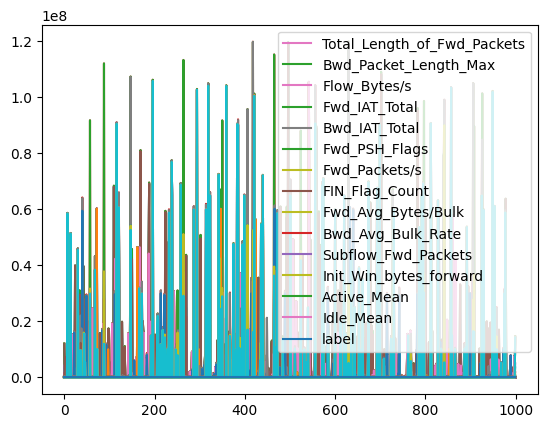

In [ ]:
df.plot()

In [ ]:
X=df.iloc[:,:80]
X

,_Source_Port,_Destination_Port,_Protocol,_Flow_Duration,_Total_Fwd_Packets,_Total_Backward_Packets,Total_Length_of_Fwd_Packets,_Total_Length_of_Bwd_Packets,_Fwd_Packet_Length_Max,_Fwd_Packet_Length_Min,...,_act_data_pkt_fwd,_min_seg_size_forward,Active_Mean,_Active_Std,_Active_Max,_Active_Min,Idle_Mean,_Idle_Std,_Idle_Max,_Idle_Min
0,34451,443,6,12140931,9,6,334,3664,208,0,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
1,53892,443,6,418882,102,203,829,279509,517,0,...,3,32,0.0,0.0,0,0,0.0,0.0,0,0
2,443,50750,6,45,2,0,55,0,55,0,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
3,23025,53,17,541699,1,1,39,225,39,39,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
4,52602,443,6,7310795,3,0,0,0,0,0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,80,58573,6,220047,6,3,2098,0,1448,0,...,3,32,0.0,0.0,0,0,0.0,0.0,0,0
996,35604,443,6,1205304,2,0,0,0,0,0,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
997,52599,80,6,7658686,2,0,0,0,0,0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
998,80,44282,6,2419,1,1,0,0,0,0,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0


In [ ]:
X.shape

(1000, 80)

In [ ]:
x1=X.iloc[:,1:5]
x1

,_Destination_Port,_Protocol,_Flow_Duration,_Total_Fwd_Packets
0,443,6,12140931,9
1,443,6,418882,102
2,50750,6,45,2
3,53,17,541699,1
4,443,6,7310795,3
...,...,...,...,...
995,58573,6,220047,6
996,443,6,1205304,2
997,80,6,7658686,2
998,44282,6,2419,1


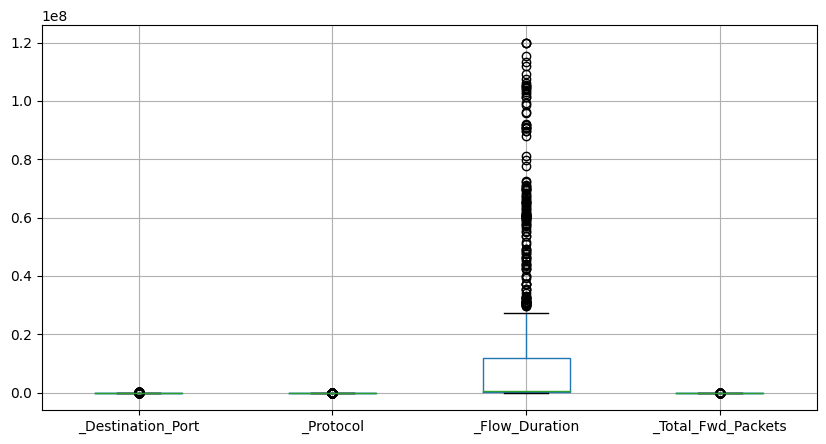

In [ ]:
x1 = pd.DataFrame(x1)
x1.boxplot(figsize=(10, 5));

In [ ]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1:]
y.shape





(1000, 1)

In [ ]:
y.head() #1 as true and 0 as false

,label
0,0
1,0
2,0
3,0
4,0


In [ ]:
y=y.astype('int')

In [ ]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)





In [ ]:
y=y.to_numpy()

# **Split data in Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [ ]:
X_train.shape

(800, 80)

In [ ]:
y.shape

(1000, 1)

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
accuray = accuracy_score(y_test,y_pred)
print("Accuracy:", accuray)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



Accuracy: 0.565
              precision    recall  f1-score   support

           0       0.60      0.61      0.60       109
           1       0.52      0.52      0.52        91

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200



# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_test,y_pred)
print("Accuracy:", accuray)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



Accuracy: 0.465
              precision    recall  f1-score   support

           0       0.60      0.06      0.10       109
           1       0.46      0.96      0.62        91

    accuracy                           0.47       200
   macro avg       0.53      0.51      0.36       200
weighted avg       0.54      0.47      0.34       200



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


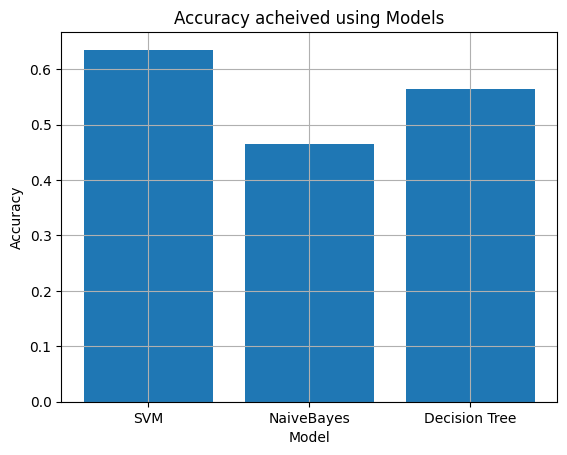

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X__ = ["SVM","NaiveBayes","Decision Tree"]
Y__ = [0.635,0.465,0.565]




plt.bar(X__,Y__)

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy acheived using Models")
plt.grid()
plt.show()


# **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(kernel='linear') #Default hyperparameters
model=svc.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score:
0.635


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.62      0.86      0.72       109
           1       0.69      0.36      0.47        91

    accuracy                           0.64       200
   macro avg       0.65      0.61      0.60       200
weighted avg       0.65      0.64      0.61       200



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


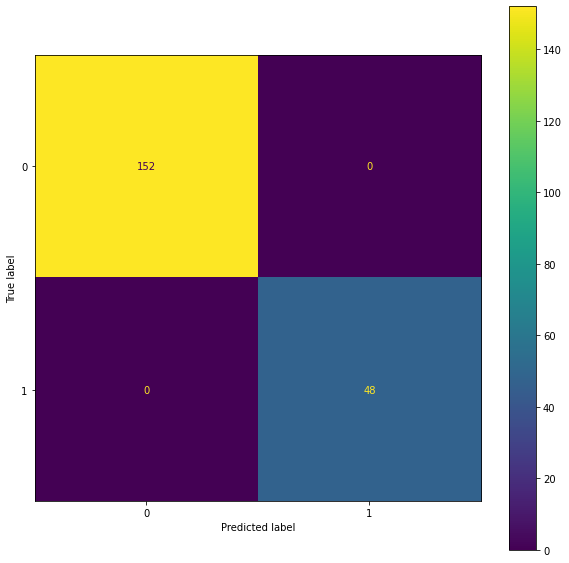

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model,X_test, y_pred,ax=ax)

In [ ]:
confusion_matrix= confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[94 15]
 [58 33]]


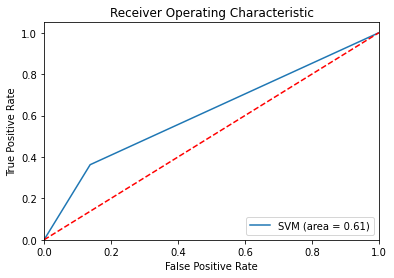

In [ ]:
logit_roc_auc= roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.86      0.72       109
           1       0.69      0.36      0.47        91

    accuracy                           0.64       200
   macro avg       0.65      0.61      0.60       200
weighted avg       0.65      0.64      0.61       200



In [ ]:
print("--------Total keyloggers found------------")

--------Total keyloggers found------------


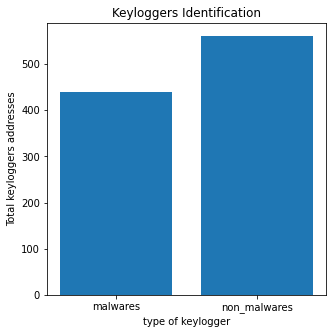

In [ ]:
malwares=list(df.label).count(1)
non_malwares=list(df.label).count(0)
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = ["malwares","non_malwares"]
# corresponding y axis values
y = [malwares,non_malwares]
plt.rcParams["figure.figsize"] = (5,5)

# plotting a histogram
plt.bar(x, y)

# x-axis label
plt.xlabel('type of keylogger')
# frequency label
plt.ylabel('Total keyloggers addresses')
# plot title
plt.title('Keyloggers Identification')

# function to show the plot
plt.show()


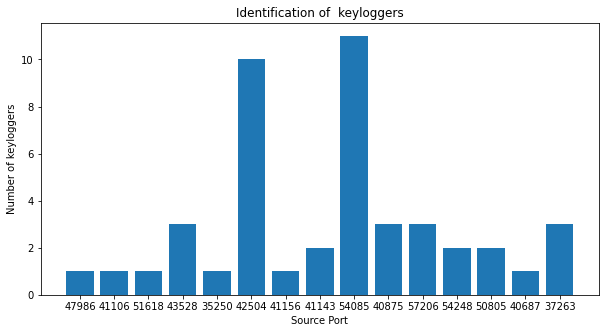

In [ ]:
import numpy as np
import sys
import matplotlib

x=[]
y=[]
sourcePort=df1[df1['label'] == 1 ][["_Source_Port"]].sample(15).values.tolist()
EncryptedPackets=df1[df1['label'] == 1 ][["_Total_Fwd_Packets"]].sample(15).values.tolist()
for i in range(len(sourcePort)):
  x.append(str(sourcePort[i][0]))
  y.append(EncryptedPackets[i][0])

plt.rcParams["figure.figsize"] = (10,5)


plt.bar(x, y)
# x-axis label
plt.xlabel('Source Port')
# frequency label
plt.ylabel('Number of keyloggers')
# plot title
plt.title('Identification of  keyloggers')

# function to show the plot
plt.show()